#Imports e Primeiras Análises

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as sts

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/Global-Superstore.xlsx'

sheets = pd.read_excel(path, sheet_name=None)
sheet_orders = sheets['Orders']
sheet_returns = sheets['Returns']
sheet_people = sheets['People']
print(sheet_orders.head())
print(sheet_returns.head())
print(sheet_people.head())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

In [3]:
print(f'Tabela Orders: {sheet_orders.shape}')
print(f'Tabela Returns: {sheet_returns.shape}')
print(f'Tabela People: {sheet_people.shape}')

Tabela Orders: (51290, 24)
Tabela Returns: (1173, 3)
Tabela People: (13, 2)


In [4]:
sheet_orders.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [5]:
sheet_returns.describe()

,Returned,Order ID,Market
count,1173,1173,1173
unique,1,1172,4
top,Yes,US-2014-136679,LATAM
freq,1173,2,297


In [6]:
sheet_people.describe()

,Person,Region
count,13,13
unique,13,13
top,Anna Andreadi,Central
freq,1,1


In [7]:
sheet_orders.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [8]:
sheet_returns.isnull().sum()

,0
Returned,0
Order ID,0
Market,0


In [9]:
sheet_people.isnull().sum()

,0
Person,0
Region,0


In [10]:
sheet_people['Region'] = sheet_people['Region'].replace('AMEA', 'EMEA')
sheet_orders['Postal Code'].fillna(0, inplace=True)
sheet_orders['Postal Code'] = sheet_orders['Postal Code'].astype(int)
sheet_orders.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [11]:
orders_returns = pd.merge(sheet_orders, sheet_returns, on='Order ID', how='left')
df = pd.merge(orders_returns, sheet_people, on='Region', how='left')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Returned,Market_y,Person
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,NaN,NaN,Kelly Williams
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,Yes,APAC,Anthony Jacobs
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,NaN,NaN,Anthony Jacobs
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,NaN,NaN,Anna Andreadi
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,NaN,NaN,Deborah Brumfield


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51295 entries, 0 to 51294
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51295 non-null  int64         
 1   Order ID        51295 non-null  object        
 2   Order Date      51295 non-null  datetime64[ns]
 3   Ship Date       51295 non-null  datetime64[ns]
 4   Ship Mode       51295 non-null  object        
 5   Customer ID     51295 non-null  object        
 6   Customer Name   51295 non-null  object        
 7   Segment         51295 non-null  object        
 8   City            51295 non-null  object        
 9   State           51295 non-null  object        
 10  Country         51295 non-null  object        
 11  Postal Code     51295 non-null  int64         
 12  Market_x        51295 non-null  object        
 13  Region          51295 non-null  object        
 14  Product ID      51295 non-null  object        
 15  Ca

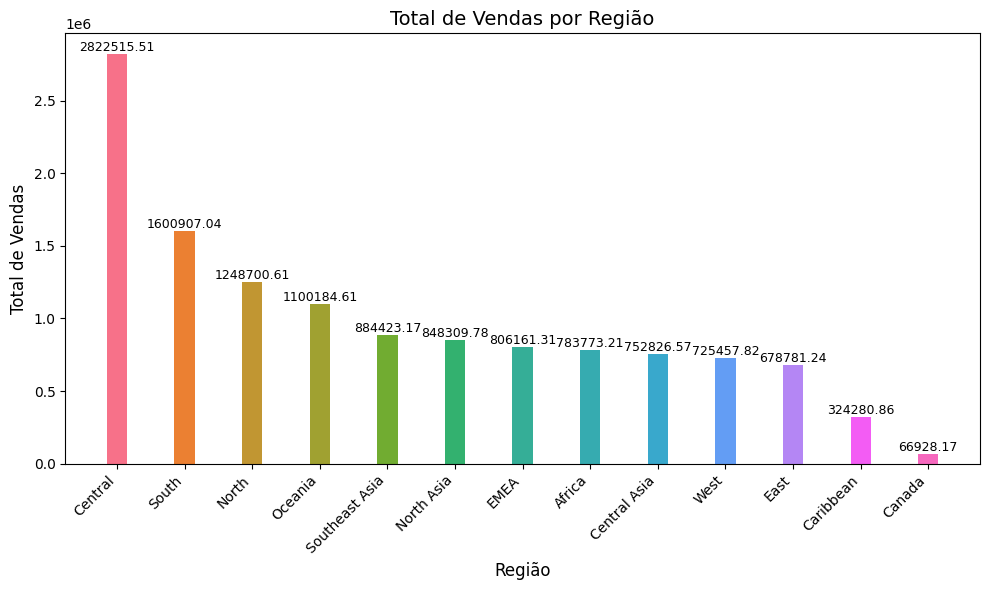

In [13]:
df = df.drop('Market_y', axis=1)
df.rename(columns={'Market_x': 'Market'}, inplace=True)

vendas_regiao = df.groupby('Region')['Sales'].sum()
vendas_regiao = vendas_regiao.sort_values(ascending=False)
colors = sns.color_palette('husl', len(vendas_regiao))
plt.figure(figsize=(10, 6))
bars = plt.bar(vendas_regiao.index, vendas_regiao.values, color=colors, width = 0.3)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=9)

plt.title('Total de Vendas por Região', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

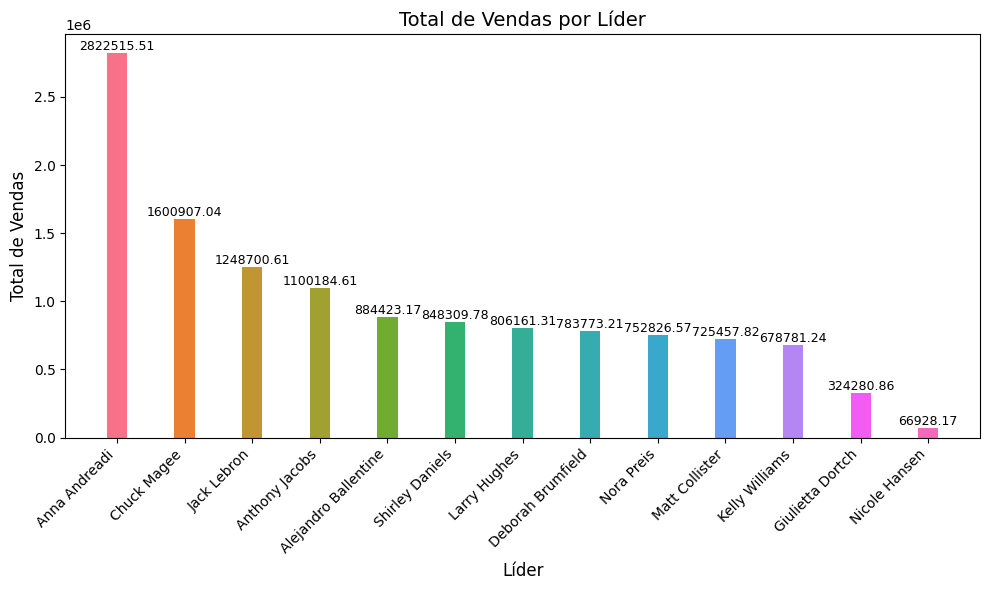

In [14]:
vendas_pessoa = df.groupby('Person')['Sales'].sum()
vendas_pessoa = vendas_pessoa.sort_values(ascending=False)
colors = sns.color_palette('husl', len(vendas_pessoa))
plt.figure(figsize=(10, 6))
bars = plt.bar(vendas_pessoa.index, vendas_pessoa.values, color=colors, width = 0.3)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=9)

plt.title('Total de Vendas por Líder', fontsize=14)
plt.xlabel('Líder', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

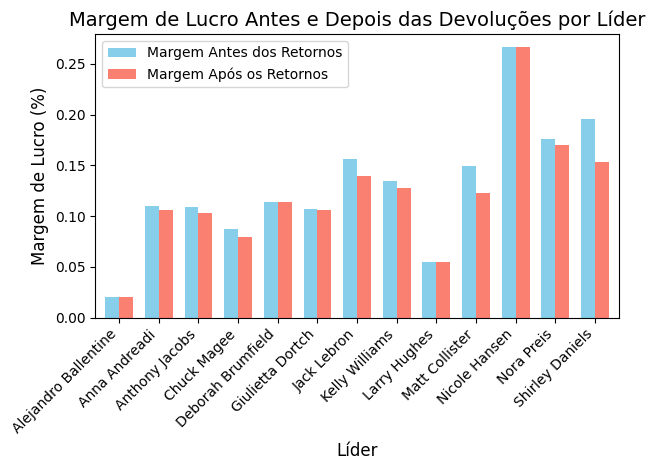

In [15]:
vendas_totais_lider = df.groupby('Person')['Sales'].sum()
lucros_antes = df.groupby('Person')['Profit'].sum()
retornos = df[df['Returned'] == 'Yes']
lucros_perdidos = retornos.groupby('Person')['Profit'].sum()
lucros_depois = lucros_antes - lucros_perdidos.reindex_like(lucros_antes).fillna(0)
margem_antes = lucros_antes / vendas_totais_lider
margem_depois = lucros_depois / vendas_totais_lider

comparacao = pd.DataFrame({
    'Margem Antes dos Retornos': margem_antes,
    'Margem Após os Retornos': margem_depois
})

plt.figure(figsize=(20, 20))
comparacao.plot(kind='bar', color=['skyblue', 'salmon'], width=0.7)
plt.title('Margem de Lucro Antes e Depois das Devoluções por Líder', fontsize=14)
plt.xlabel('Líder', fontsize=12)
plt.ylabel('Margem de Lucro (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

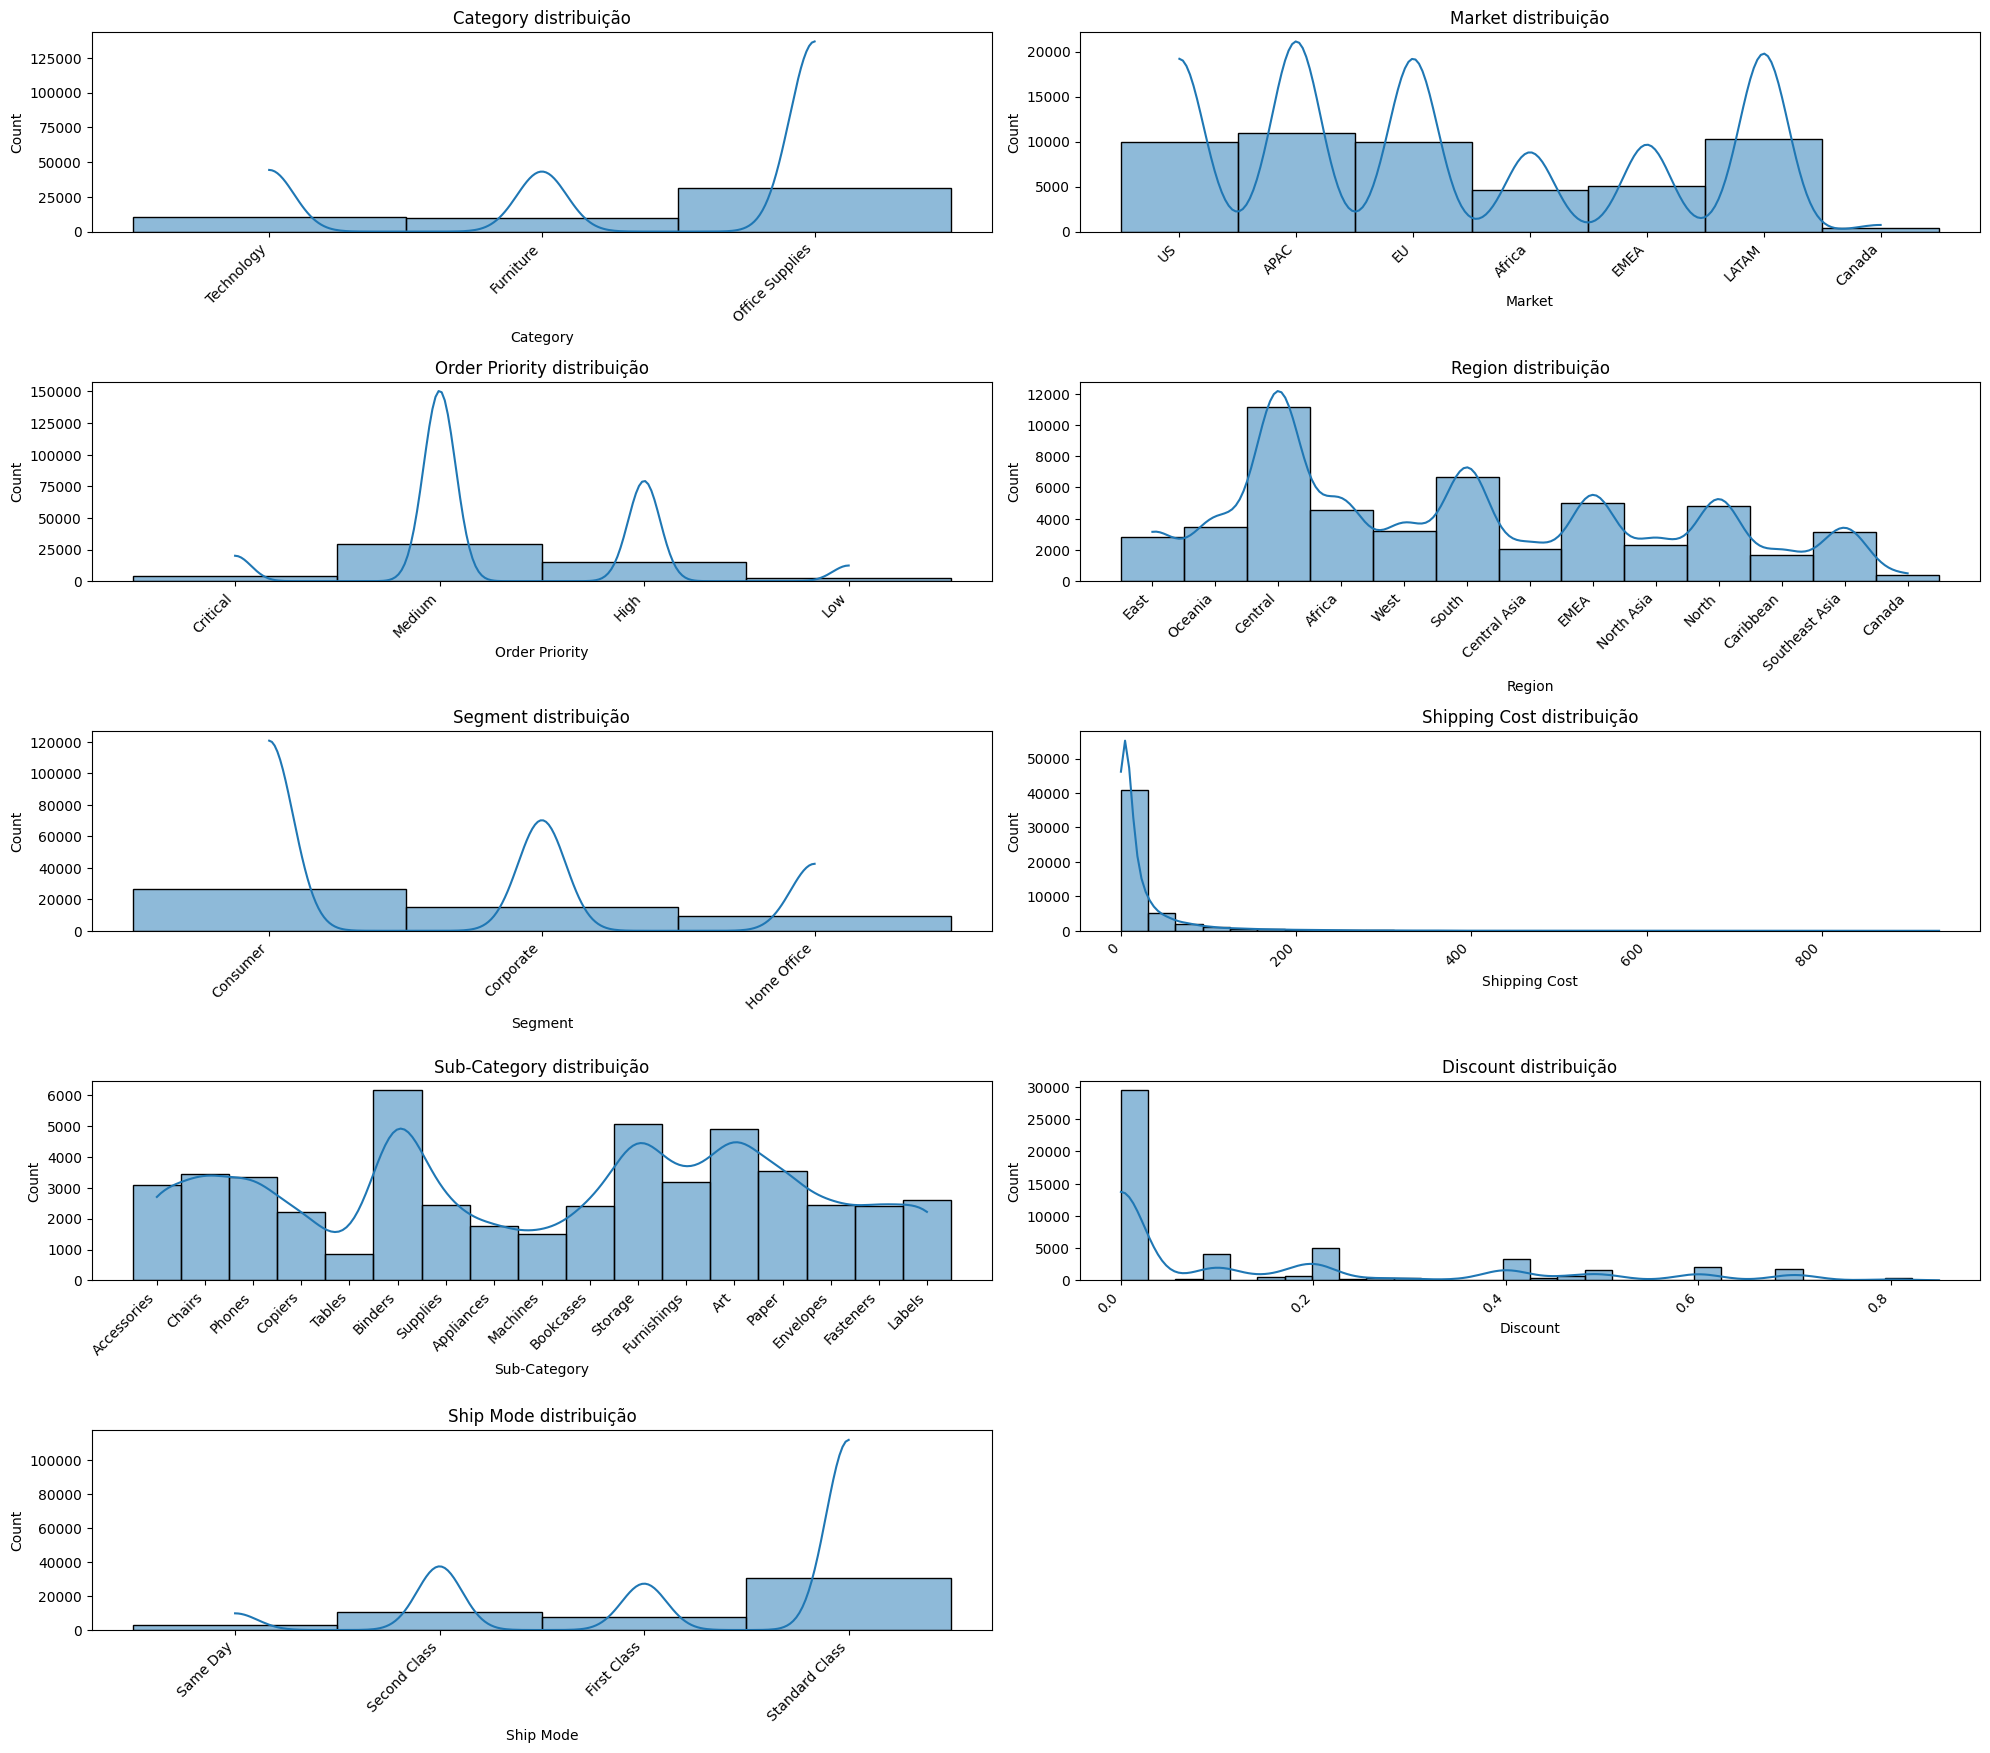

In [16]:
cols1 = ['Category','Market','Order Priority','Region','Segment','Shipping Cost','Sub-Category','Discount', 'Ship Mode']
plt.figure(figsize=(20,20))
for i, column in enumerate(cols1):
    plt.subplot(6,2, i+1)
    sns.histplot(data=df, x=column, kde=True, bins=30)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{column} distribuição')
    plt.tight_layout()

## Desvio padrão de algumas características importantes após Devoluções

In [44]:
retornos = df[df['Returned'] != 'Yes']
aux = retornos.groupby('Region')['Sales'].sum().reset_index()
soma_vendas = aux['Sales'].tolist()
desvio = sts.stdev(soma_vendas)
regioes_com_outliers = aux[aux['Sales'] >= 2 * desvio]

print(regioes_com_outliers)

     Region         Sales
3   Central  2.677694e+06
10    South  1.501139e+06


Central e South como regiões outliers em relação a Vendas, ou seja, que mais venderam

In [45]:
lucros_sem_dev = retornos.groupby('Person')['Profit'].sum()
aux = lucros_sem_dev.reset_index()
soma_vendas = aux['Profit'].tolist()
desvio2 = sts.stdev(soma_vendas)
print(f'DP Líder por Lucro: {desvio2}')

DP Líder por Lucro: 75610.71188500637


In [46]:
lucros_sem_dev = retornos.groupby('Person')['Sales'].sum()
aux = lucros_sem_dev.reset_index()
soma_vendas = aux['Sales'].tolist()
desvio3 = sts.stdev(soma_vendas)
print(f'DP Líder por Venda: {desvio3}')

DP Líder por Venda: 637430.8899386002


In [50]:
lucros_sem_dev = retornos.groupby('Market')['Sales'].sum()
aux = lucros_sem_dev.reset_index()
soma_vendas = aux['Sales'].tolist()
desvio4 = sts.stdev(soma_vendas)
print(f'DP Mercado por Venda: {desvio4}')

DP Mercado por Venda: 1173209.858225351


In [51]:
lucros_sem_dev = retornos.groupby('Market')['Profit'].sum()
aux = lucros_sem_dev.reset_index()
soma_vendas = aux['Profit'].tolist()
desvio4 = sts.stdev(soma_vendas)
print(f'DP Mercado por Lucro: {desvio4}')

DP Mercado por Lucro: 146828.8079103241


# Forecast de Vendas/Lucros e outros modelos


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplfb2dvzf/0o41_hs_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplfb2dvzf/wguh1t_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80622', 'data', 'file=/tmp/tmplfb2dvzf/0o41_hs_.json', 'init=/tmp/tmplfb2dvzf/wguh1t_b.json', 'output', 'file=/tmp/tmplfb2dvzf/prophet_modelb0q9ciw7/prophet_model-20240910015413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:54:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:54:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplf

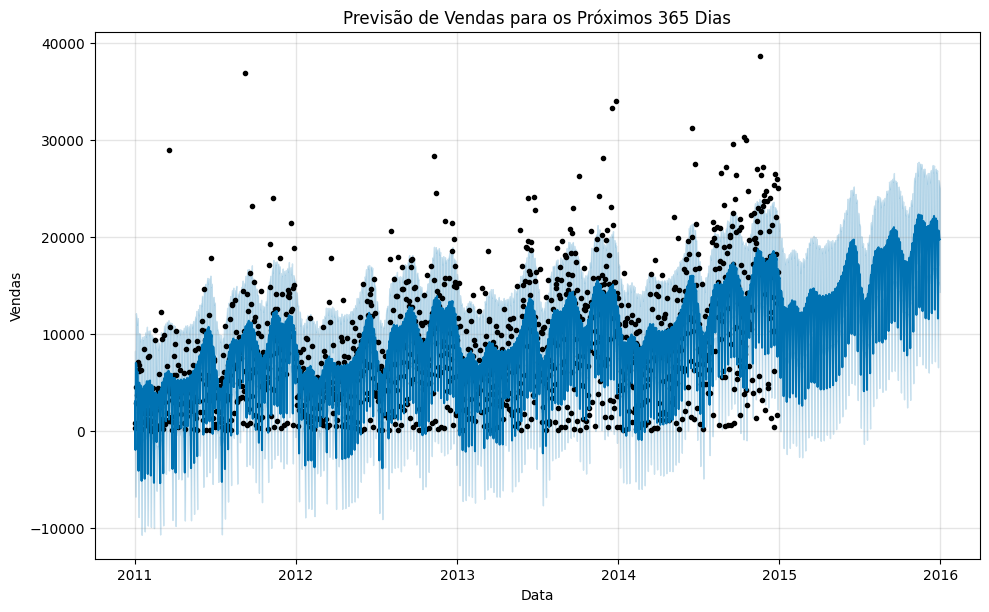

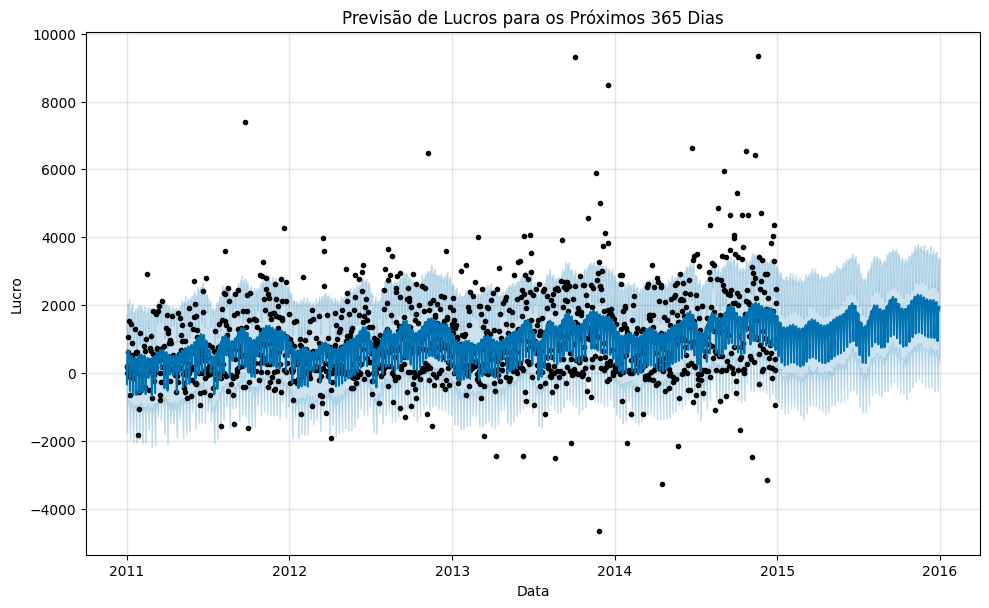

In [21]:
from prophet import Prophet

df['Order Date'] = pd.to_datetime(df['Order Date'])
df_filtered = df[df['Returned'] != 'Yes']

vendas_diarias = df_filtered.groupby('Order Date')['Sales'].sum().reset_index()
lucro_diario = df_filtered.groupby('Order Date')['Profit'].sum().reset_index()
vendas_diarias.columns = ['ds', 'y']
lucro_diario.columns = ['ds', 'y']

model1 = Prophet()
model1.fit(vendas_diarias)
model_profit = Prophet()
model_profit.fit(lucro_diario)

vendas_futuras = model1.make_future_dataframe(periods=365)
lucro_futuro = model_profit.make_future_dataframe(periods=365)

forecast_vendas = model1.predict(vendas_futuras)
forecast_lucro = model_profit.predict(lucro_futuro)

fig_sales = model1.plot(forecast_vendas)
plt.title('Previsão de Vendas para os Próximos 365 Dias')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.show()

fig_profit = model_profit.plot(forecast_lucro)
plt.title('Previsão de Lucros para os Próximos 365 Dias')
plt.xlabel('Data')
plt.ylabel('Lucro')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Países do cluster com maior lucro: ['Australia', 'China', 'France', 'Germany', 'India', 'Mexico', 'United Kingdom', 'United States']


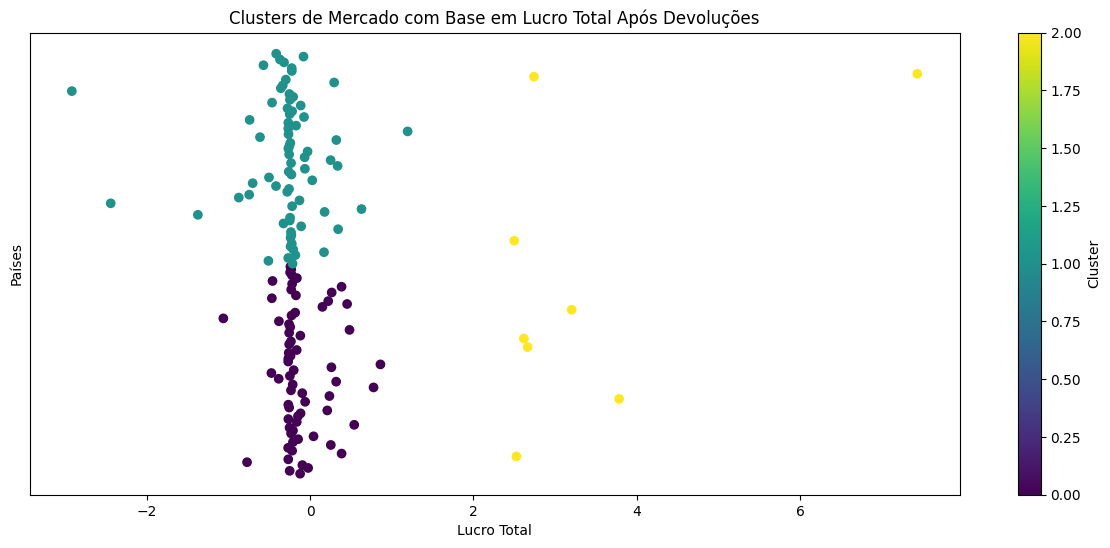

In [43]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

df_filtered = df[df['Returned'] != 'yes']
df_filtered.columns = df_filtered.columns.str.strip()
lucro_pais = df_filtered.groupby('Country')['Profit'].sum().reset_index()

le = LabelEncoder()
lucro_pais['Country_encoded'] = le.fit_transform(lucro_pais['Country'])
scaler = StandardScaler()
lucro_pais[['Profit', 'Country_encoded']] = scaler.fit_transform(lucro_pais[['Profit', 'Country_encoded']])
kmeans = KMeans(n_clusters=3, random_state=42)
lucro_pais['Cluster'] = kmeans.fit_predict(lucro_pais[['Profit', 'Country_encoded']])

cluster_lucro = lucro_pais.groupby('Cluster')['Profit'].sum()
cluster_com_maior_lucro = cluster_lucro.idxmax()

paises_cluster_maior_lucro = lucro_pais[lucro_pais['Cluster'] == cluster_com_maior_lucro]['Country'].tolist()
print(f'Países do cluster com maior lucro: {paises_cluster_maior_lucro}')

plt.figure(figsize=(15, 6))
scatter = plt.scatter(lucro_pais['Profit'], lucro_pais['Country_encoded'], c=lucro_pais['Cluster'], cmap='viridis', marker='o')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Lucro Total')
plt.ylabel('Países')
plt.title('Clusters de Mercado com Base em Lucro Total Após Devoluções')
plt.yticks([])
plt.show()

É visto que United States tem um lucro em média muito maior que os outros países. Se comportando como um outlier.

Países do cluster com maior lucro: ['Australia', 'China', 'France', 'Germany', 'India', 'Mexico', 'United Kingdom', 'United States']

## Correlação entre colunas númericas

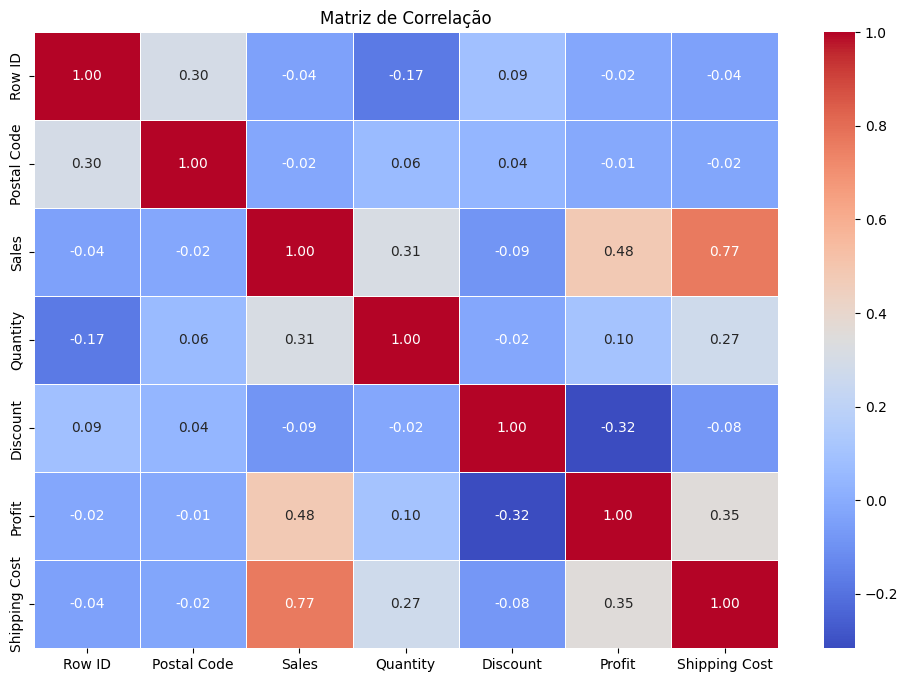

In [23]:
df_num = df.select_dtypes(include=[np.number])

correlacao = df_num.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Forte correlação entre 'Shipping Cost' e 'Sales'

## Utilizando PCA e K-Means para extrair padrões de clientes

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


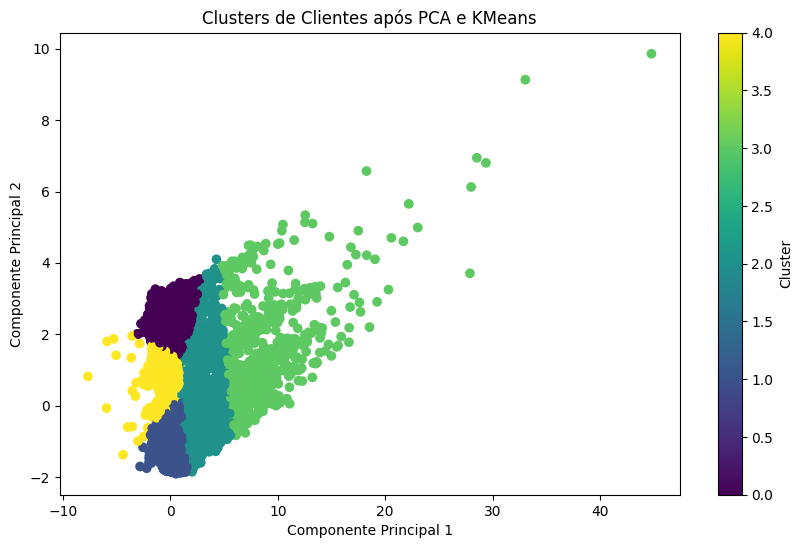

               Row ID   Postal Code        Sales  Quantity  Discount  \
Cluster                                                                
0        36555.284958  80838.160620   160.740552  3.724679  0.183356   
1        14458.768554      0.000000   146.213981  3.523464  0.123908   
2        22667.802538   3583.155639   941.633078  5.547441  0.059735   
3        25829.960894  10984.030726  2875.211459  6.818436  0.050944   
4        41521.076440   6536.196919    99.238034  2.494611  0.191390   

             Profit  Shipping Cost  Cluster  
Cluster                                      
0          9.220183      16.558520      0.0  
1          6.670237      14.434633      1.0  
2        171.117750     104.947878      2.0  
3        712.226421     337.860336      3.0  
4         -5.470277      10.111648      4.0  


In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

columns_text = ['Segment', 'Ship Mode', 'Market', 'Region', 'Category', 'Sub-Category']
features_num = [col for col in df.select_dtypes(include=[float, int]).columns if col not in columns_text]
irrelevante = ['Order ID']
relevante = [col for col in df.columns if col not in irrelevante]
columns_text = [col for col in columns_text if col in relevante]
features_num = [col for col in features_num if col in relevante]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), features_num),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
        ]), columns_text)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

df_transf = df[relevante]
df['Cluster'] = pipeline.fit_predict(df_transf)
df_preproc = pipeline.named_steps['preprocessor'].transform(df_transf)
pca_comp = pipeline.named_steps['pca'].transform(df_preproc)
clusters = pipeline.named_steps['kmeans'].predict(pca_comp)
df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
plt.scatter(pca_comp[:, 0], pca_comp[:, 1], c=clusters, cmap='viridis', marker='o')
plt.colorbar(label='Cluster')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de Clientes após PCA e KMeans')
plt.show()

df_num = df.select_dtypes(include=[float, int])
cluster_summary = df_num.groupby(df['Cluster']).mean()
print(cluster_summary)

Cada componente principal é uma combinação linear das variáveis originais e é ortogonal (independente) dos outros componentes.
O primeiro componente principal captura a maior parte da variabilidade dos dados, o segundo captura a maior parte da variabilidade restante, e assim por diante.
Quando é reduzido os dados a 2 componentes principais, é projetado os dados em um plano bidimensional. Isso pode ajudar a identificar padrões ou anomalias nos dados. Cada linha representa um cluster e os valores correspondentes representam as médias dos atributos para as instâncias que pertencem a esse cluster.

## Extração de características que influenciam mais no valor de venda e lucro

Nesse contexto, está sendo levado em consideração o valor antes de possível devolução de cliente. Assim, mostrando características que mais influenciam no valor total de venda e lucro do respectivo produto, independente se foi retornado.


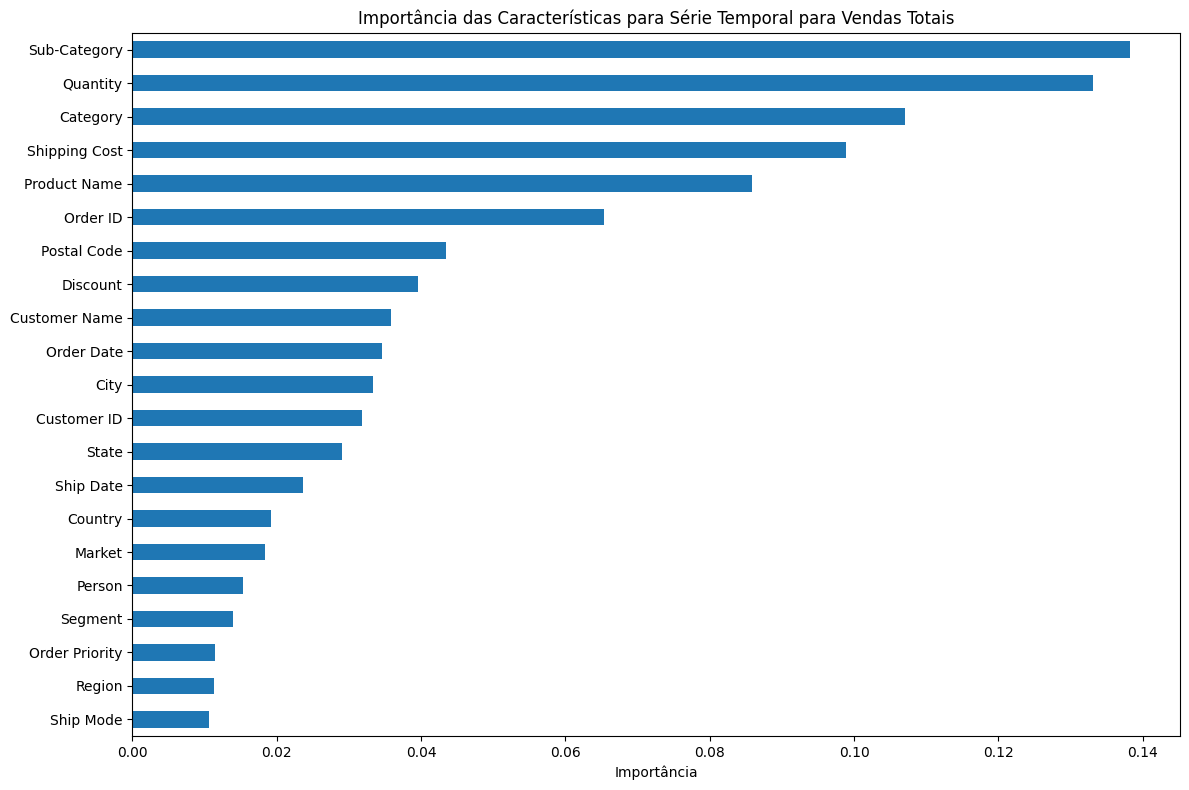

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_f = df.drop(['Sales', 'Profit', 'Cluster', 'Product ID', 'Row ID', 'Returned'], axis=1)
y_f = df['Sales']

X_f = X_f.astype(str)
label_encoder = LabelEncoder()
for column in X_f.columns:
    if X_f[column].dtype == 'object':
        X_f[column] = label_encoder.fit_transform(X_f[column])

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, random_state=42)

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train_f, y_train_f)

importances = forest.feature_importances_

feature_names = X_f.columns
forest_importances = pd.Series(importances, index=feature_names)
forest_importances_sorted = forest_importances.sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
forest_importances_sorted.plot.barh(ax=ax)
ax.set_title("Importância das Características para Série Temporal para Vendas Totais")
ax.set_xlabel("Importância")
fig.tight_layout()
plt.show()

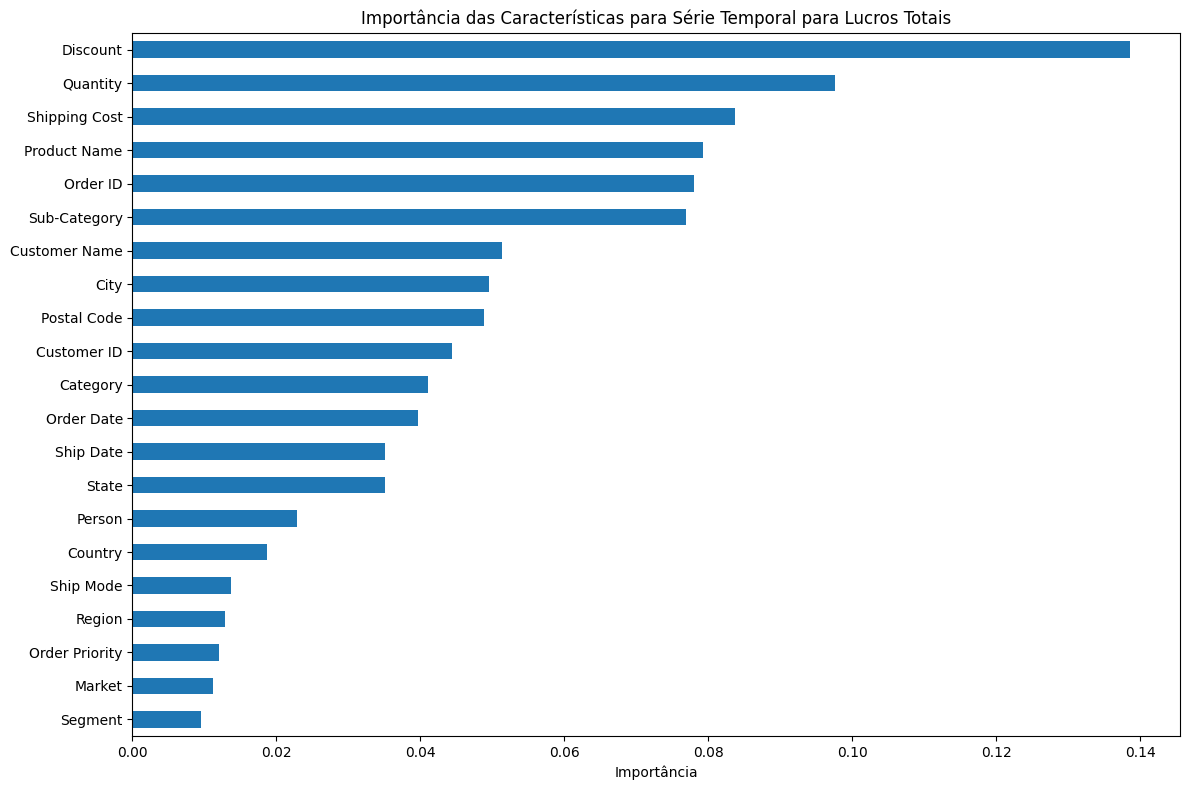

In [42]:
X_f = df.drop(['Sales', 'Profit', 'Cluster', 'Product ID', 'Row ID', 'Returned'], axis=1)
y_f = df['Profit']

X_f = X_f.astype(str)
label_encoder = LabelEncoder()
for column in X_f.columns:
    if X_f[column].dtype == 'object':
        X_f[column] = label_encoder.fit_transform(X_f[column])

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, random_state=42)

forest = RandomForestRegressor(random_state=42)
forest.fit(X_train_f, y_train_f)

importances = forest.feature_importances_

feature_names = X_f.columns
forest_importances = pd.Series(importances, index=feature_names)
forest_importances_sorted = forest_importances.sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
forest_importances_sorted.plot.barh(ax=ax)
ax.set_title("Importância das Características para Série Temporal para Lucros Totais")
ax.set_xlabel("Importância")
fig.tight_layout()
plt.show()